<a href="https://colab.research.google.com/github/imen-g/Deep-Learning/blob/master/MULTICLASS_classification_keras_tuner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Importing libraries**



In [9]:
import numpy
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

**Importing the Dataset**

In [10]:
data = pd.read_csv('iris.csv',parse_dates=True) 
data.sample(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
122,7.7,2.8,6.7,2.0,Virginica
87,6.3,2.3,4.4,1.3,Versicolor
56,6.3,3.3,4.7,1.6,Versicolor
146,6.3,2.5,5.0,1.9,Virginica
133,6.3,2.8,5.1,1.5,Virginica


**Data processing**

In [11]:
data.isna().sum() #Checking for missing values

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
data.variety.value_counts()

Versicolor    50
Setosa        50
Virginica     50
Name: variety, dtype: int64

In [14]:
data.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


For better performance of our model we need to keep numerical values between 0 and 1

In [15]:
data.max() #displays the max of every column

sepal.length          7.9
sepal.width           4.4
petal.length          6.9
petal.width           2.5
variety         Virginica
dtype: object

In [16]:
data['sepal.length'] = data['sepal.length']/7.9
data['sepal.width'] = data['sepal.width']/4.4
data['petal.length'] = data['petal.length']/6.9
data['petal.width'] = data['petal.width']/2.5


In [17]:
data.sample(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
84,0.683544,0.681818,0.652174,0.60,Versicolor
121,0.708861,0.636364,0.710145,0.80,Virginica
92,0.734177,0.590909,0.579710,0.48,Versicolor
122,0.974684,0.636364,0.971014,0.80,Virginica
67,0.734177,0.613636,0.594203,0.40,Versicolor


**Model creation**



In [18]:
data = data.values
X = data[:,0:4].astype(float)
Y = data[:,4]

In [19]:
X

array([[0.64556962, 0.79545455, 0.20289855, 0.08      ],
       [0.62025316, 0.68181818, 0.20289855, 0.08      ],
       [0.59493671, 0.72727273, 0.1884058 , 0.08      ],
       [0.58227848, 0.70454545, 0.2173913 , 0.08      ],
       [0.63291139, 0.81818182, 0.20289855, 0.08      ],
       [0.6835443 , 0.88636364, 0.24637681, 0.16      ],
       [0.58227848, 0.77272727, 0.20289855, 0.12      ],
       [0.63291139, 0.77272727, 0.2173913 , 0.08      ],
       [0.55696203, 0.65909091, 0.20289855, 0.08      ],
       [0.62025316, 0.70454545, 0.2173913 , 0.04      ],
       [0.6835443 , 0.84090909, 0.2173913 , 0.08      ],
       [0.60759494, 0.77272727, 0.23188406, 0.08      ],
       [0.60759494, 0.68181818, 0.20289855, 0.04      ],
       [0.5443038 , 0.68181818, 0.15942029, 0.04      ],
       [0.73417722, 0.90909091, 0.17391304, 0.08      ],
       [0.72151899, 1.        , 0.2173913 , 0.16      ],
       [0.6835443 , 0.88636364, 0.1884058 , 0.16      ],
       [0.64556962, 0.79545455,

In [ ]:
Y

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolo

In [20]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables 
dummy_y = np_utils.to_categorical(encoded_Y)

In [21]:
dummy_y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard

checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor="accuracy")
early_stopping = EarlyStopping(monitor="accuracy", patience=10, min_delta=10000)
reduce_lr = ReduceLROnPlateau(monitor="accuracy", factor=0.5, patience=10, min_delta=100000)
#tensorboard = TensorBoard("logs") #W&B

In [ ]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=4, activation='relu', kernel_regularizer='l1', bias_regularizer='l2', activity_regularizer='l1_l2'))
	model.add(Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [ ]:
hist = baseline_model().fit(X, dummy_y, batch_size=5, epochs=100, verbose=2,callbacks=[checkpoint, early_stopping, reduce_lr])
                 

Epoch 1/100
30/30 - 0s - loss: 1.2072 - accuracy: 0.3333
Epoch 2/100
30/30 - 0s - loss: 1.1942 - accuracy: 0.3333
Epoch 3/100
30/30 - 0s - loss: 1.1838 - accuracy: 0.3333
Epoch 4/100
30/30 - 0s - loss: 1.1729 - accuracy: 0.3333
Epoch 5/100
30/30 - 0s - loss: 1.1631 - accuracy: 0.3400
Epoch 6/100
30/30 - 0s - loss: 1.1536 - accuracy: 0.2133
Epoch 7/100
30/30 - 0s - loss: 1.1440 - accuracy: 0.4600
Epoch 8/100
30/30 - 0s - loss: 1.1348 - accuracy: 0.5000
Epoch 9/100
30/30 - 0s - loss: 1.1262 - accuracy: 0.5400
Epoch 10/100
30/30 - 0s - loss: 1.1176 - accuracy: 0.6333
Epoch 11/100
30/30 - 0s - loss: 1.1082 - accuracy: 0.8133


In [ ]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

In [ ]:
kfold = KFold(n_splits=10, shuffle=True)

In [ ]:
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
results.mean()

0.9600000023841858

In [ ]:
losses = hist.history['loss']
epochs = hist.epoch

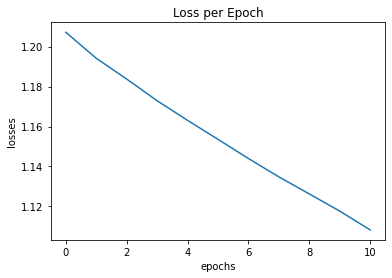

In [ ]:
plt.plot(epochs, losses)
plt.xlabel("epochs")
plt.ylabel('losses')
plt.title('Loss per Epoch')
plt.show()

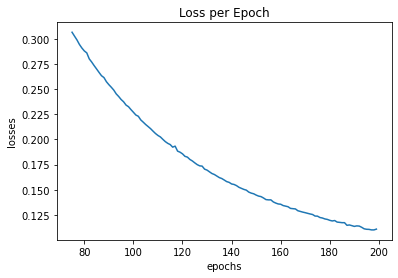

In [ ]:
plt.plot(epochs[75:], losses[75:])
plt.xlabel("epochs")
plt.ylabel('losses')
plt.title('Loss per Epoch')
plt.show()

In [ ]:
preds=baseline_model().predict_classes(X) 

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(dummy_y, preds,normalize='true')
print(conf_mat)

[[0.   0.   1.  ]
 [0.32 0.   0.68]
 [1.   0.   0.  ]]


**Benchmark:** 

Accuracy avant :0.7200000166893006

1/checkpoint: 0.7000000178813934

2/early_stopping : 0.7066666811704636

3/checkpoint +early_stopping: 0.6733333528041839

4/régularisation :0.9066666722297668

5/checkpoint+early_stopping+régularisation :0.9333333373069763

6/checkpoint+early_stopping+régularisation+reduce_lr: 0.9600000023841858

7/régularisation+reduce_lr: 0.9333333373069763

Le meilleur résultat obtenu est **0.9600000023841858**
les techniques utilisées :

1/checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor="accuracy")

2/early_stopping = EarlyStopping(monitor="accuracy", patience=16, min_delta=10000)

3/reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.5, patience=10, min_delta=100000)

4/model.add(Dense(8, input_dim=4, activation='relu', kernel_regularizer='l1', bias_regularizer='l2', activity_regularizer='l1_l2'))

**Refaire le TP avec Keras Tuner**

In [1]:
import tensorflow as tf
from tensorflow import keras

import IPython

In [2]:
!pip install -U keras-tuner
import kerastuner as kt

     |████████████████████████████████| 71kB 3.6MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp36-none-any.whl size=78939 sha256=27f54fda383ebc318b2a4bf2908358ee0fcdbc08c883de483b434c64e8e557d5
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15357 sha256=06381e613af2d7e70c7950ae24d5e96067fb4ad3c9e15c8cd260406fd4d54563
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [65]:
def model_builder(hp):
  model = keras.Sequential()
  
  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 32)
  model.add(keras.layers.Dense(units = hp_units, activation = 'softmax'))
  model.add(keras.layers.Dense(10))

  # Tune the learning rate for the optimizer 
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
  
  model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
                metrics = ['accuracy'])
  
  return model

In [77]:
tuner = kt.Hyperband(model_builder,
                     objective = 'accuracy', 
                     max_epochs = 10,
                     factor = 3,
                     directory = 'my_dir',
                     project_name = 'intro_to_kt')   

INFO:tensorflow:Reloading Oracle from existing project my_dir/intro_to_kt/oracle.json


In [78]:
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [75]:
X = X.reshape(1,-1)
dummy_y = dummy_y.reshape(1,-1)


In [79]:
tuner.search(X, dummy_y, epochs = 10, callbacks = [ClearTrainingOutput()])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")



Trial 30 Complete [00h 00m 00s]
accuracy: 0.0

Best accuracy So Far: 1.0
Total elapsed time: 00h 00m 14s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 160 and the optimal learning rate for the optimizer
is 0.01.



In [82]:
# Build the model with the optimal hyperparameters and train it on the data
model = tuner.hypermodel.build(best_hps)
model.fit(X, dummy_y, epochs = 10)

Epoch 1/10
1/1 [==============================] - 0s 1ms/step - loss: 2.2844 - accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 940us/step - loss: 2.1961 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 1ms/step - loss: 2.1370 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 1ms/step - loss: 2.0896 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 2.0430 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/step - loss: 1.9957 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 2ms/step - loss: 1.9494 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 1.9031 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 1ms/step - loss: 1.8610 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 1.8220 - accuracy: 1.0000
